In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from modules.moons import Moons
#from modules.Nbody_units import Nbody_units
from modules.Saturn_Nbody_units import Nbody_units

sns.set(style="whitegrid")

save = True

#%matplotlib notebook

In [33]:
# First we set the Nbody unit class in Saturn scale:
nu = Nbody_units()

"""
The Saturn class is defined with the following units:
>>> mass unit = Saturn mass
>>> distance unit = Epimetheus semi-major axis (151410 km)
>>> velocity unit = km/s
>>> time unit = years
"""

# initial conditions:
"""
Even if the class is called 'Moons', the first moon is the Saturn itself,
then the other two correspond to Janus-Epimetheus.

We take as initial condition Janus-Epimetheus in the opposite side of Saturn.
the values are taken from Spitale et. all 2006 (p.14), since their ellipticity is very small, we can assume a circular orbit and taking
'a' as the radius of the orbit.
Mass of Janus = 1.98e18 kg and Epimetheus = 5.5e17 kg are from: https://www.whitman.edu/Documents/Academics/Mathematics/sakari.pdf
"""

# Janus-Epimetheus masses in Saturn masses
m_Janus = 1.98e18 * nu.kg_to_gr / nu.Msaturn_cgs
m_Epimetheus = 5.5e17 * nu.kg_to_gr / nu.Msaturn_cgs

# mass from "formation of Janus-Epimetheus" paper Treffenstadt
#m_Janus = 0.58333e-8
#m_Epimetheus = 0.11667e-8

# Janus-Epimetheus radius in [N-body units]
a_scale = 151410 # km 
a_Janus = 151460 / a_scale       # km
a_Epimetheus = 151410 / a_scale  # km

# Janus-Epimetheus velocity [N-body units]
vel_Janus = np.sqrt(1/a_Janus) # km/s
vel_Epimetheus = np.sqrt(1/a_Epimetheus) # km/s

# Set the initial conditions
mass = np.array([1, m_Janus, m_Epimetheus]).reshape(-1)      # Saturn, Janus, Epimetheus

position = np.array([[0., 0., 0.],
                     [a_Janus, 0., 0.],            # Janus
                     [-a_Epimetheus, 0., 0.]])     # Epimetheus

velocity = np.array([[0., 0., 0.],
                    [0., vel_Janus, 0.],
                    [0., -vel_Epimetheus, 0.]])

print('N-body units:')
print('mass:', mass)
print('position:', position)
print('velocity:', velocity)

# convert the initial conditions to physical units to check the values
Physical_mass = nu.m_to_Kg(mass)
Physical_position = nu.pos_to_km(position)
Physical_velocity = nu.vel_to_physical(velocity)

print('Physical units in Nbody units:')
print('mass in kg:', Physical_mass)
print('position in km:', Physical_position)
print('velocity in km/s:', Physical_velocity)


# create the moons object
System = Moons(position=position, velocity=velocity, mass=mass)

N-body units:
mass: [1.00000000e+00 3.48407531e-09 9.67798698e-10]
position: [[ 0.          0.          0.        ]
 [ 1.00033023  0.          0.        ]
 [-1.          0.          0.        ]]
velocity: [[ 0.          0.          0.        ]
 [ 0.          0.99983493  0.        ]
 [ 0.         -1.          0.        ]]
Physical units in Nbody units:
mass in kg: [5.683e+26 1.980e+18 5.500e+17]
position in km: [[      0.       0.       0.]
 [ 151460.       0.       0.]
 [-151410.       0.       0.]]
velocity in km/s: [[  0.           0.           0.        ]
 [  0.          15.82496338   0.        ]
 [  0.         -15.82757609   0.        ]]


In [34]:
## Exchange period

def exchange_period(ro, ri): 
    # we are in n-body units
    return 2*np.pi*(ro*ri)**1.5 / (ro**1.5 - ri**1.5)

Predicted_swap_period = exchange_period(np.abs(System.pos[1,0]), np.abs(System.pos[2,0]))

print(f'Predicted exchange period in n-body: {Predicted_swap_period:.4f}')
print(f'Predicted exchange period in years: {nu.t_to_yr(Predicted_swap_period):.4f}')

Predicted exchange period in n-body: 12689.7306
Predicted exchange period in years: 3.8493


Text(0, 0.5, 'y [Nbody units]')

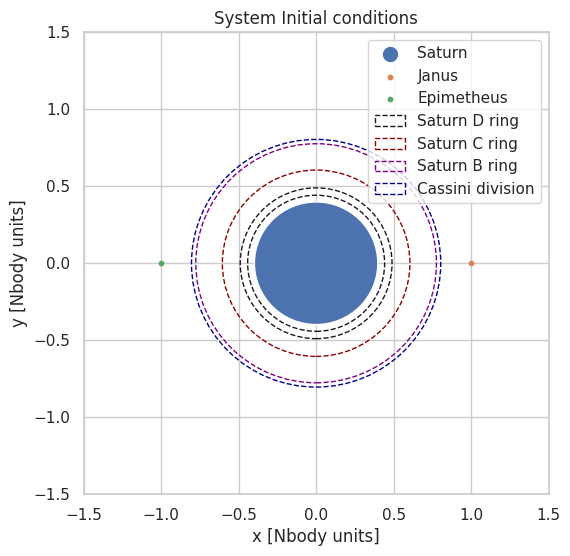

In [35]:
# check plot
fig, ax = plt.subplots(figsize=(6, 6))
Saturn = Circle((0, 0), 60268/a_scale, fill=True)
ax.scatter(System.pos[0, 0], System.pos[0, 1], s=1e2, label='Saturn')
ax.scatter(System.pos[1, 0], System.pos[1, 1], s=10, label='Janus')
ax.scatter(System.pos[2, 0], System.pos[2, 1], s=10, label='Epimetheus')
ring1 = Circle((0, 0), 66897/a_scale, fill=False, color='k', linestyle='--')
ring2 = Circle((0, 0), 74130/a_scale, fill=False, color='k', linestyle='--')
ring3 = Circle((0, 0), 91607/a_scale, fill=False, color='darkred', linestyle='--')
ring4 = Circle((0, 0), 117523/a_scale, fill=False, color='purple', linestyle='--')
ring5 = Circle((0, 0), 121741/a_scale, fill=False, color='darkblue', linestyle='--')
ring1.set_label('Saturn D ring')
ring3.set_label('Saturn C ring')
ring4.set_label('Saturn B ring')
ring5.set_label('Cassini division')
ax.add_patch(ring1)
ax.add_patch(ring2)
ax.add_patch(ring3)
ax.add_patch(ring4)
ax.add_patch(ring5)
ax.add_patch(Saturn)
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 1.5)
ax.legend(loc='upper right')
ax.set_title('System Initial conditions')
ax.set_xlabel('x [Nbody units]')
ax.set_ylabel('y [Nbody units]')

In [36]:
# Janus
a = np.sqrt(np.sum(System.pos[1]**2.))
print(a)
M_tot = np.sum(System.mass)

T_orbit = 2*np.pi * np.sqrt((a**3.)/(M_tot))
print('Period of Janus in Nbody units: ',T_orbit)
print('Period of Janus in days: ',nu.t_to_days(T_orbit))

1.0003302291790503
Period of Janus in Nbody units:  6.286297886807358
Period of Janus in days:  0.6964961561157691


In [37]:
from collections import deque
from modules.integrators import integrator_leapfrog
from modules.dynamics import acceleration_direct, acceleration_direct_vectorized, acceleration_pyfalcon

def integration_leapfrog(system: Moons, h: float, tsimulation: float, t: float, soft: float):
    path = deque()  # array to store the position of the system
    velocity = deque()  # array to store the velocity of the system
    time = deque()
    orbital_radius = deque()
    moons_distance = deque()

    print('Integrating...')
    i = 0
    while t < tsimulation - h:
        # integrate the system
        updated_system, _,  updated_acc, _, _ = integrator_leapfrog(particles=system, tstep=h,
                                                                    acceleration_estimator=acceleration_pyfalcon, softening=soft)

        # store the position and velocity of the system -> taking only every 500 iterations
        if (i == 0) or (i % 200 == 0):
            path.append(updated_system.pos)
            velocity.append(updated_system.vel)

            # calculate the orbital radius
            orbital_radius.append(updated_system.radius())
            moons_distance.append(updated_system.separation())

        # update the system
        t += h
        if (i == 0) or (i % 200 == 0):
            time.append(t)

        i += 1

    print('Integration finished')

    # transform the deques to arrays
    path = np.array(path)
    velocity = np.array(velocity)
    time = np.array(time)
    orbital_radius = np.array(orbital_radius)
    moons_distance = np.array(moons_distance)
    
    return path, velocity, time, orbital_radius, moons_distance

In [38]:
# how many orbits until swap?
orbital_period = nu.t_to_days(T_orbit) # days
swap_period = 4 * 365.25 # approx days
num_orbits = swap_period / orbital_period

# orbits before swap
print('Number of orbit until the swap: ',num_orbits)

Number of orbit until the swap:  2097.6425887943565


In [39]:
## TIME STEP

t0 = 0.0                            # initial time [yr]
tf = 24.0                           # final time [yr]
tf = nu.t_to_Nbody(tf)
print('simulation time in N body units:', tf)
print('Period of one orbit in days: ', orbital_period)

h = T_orbit / 1000

print('time step in yr: ', nu.t_to_yr(h))
print('total numer of iteration:', tf / h)

# define the time of simulation and the number of steps
softening = 0.0 #6.6e-5

System_test = System.copy()

simulation time in N body units: 79118.43703929045
Period of one orbit in days:  0.6964961561157691
time step in yr:  1.9069025492560413e-06
total numer of iteration: 12585855.532766137


In [40]:
import os
# integrate the system using the leapfrog method
path = 'outputs/test_v2_NOsoft/'

if not os.path.exists(path):

    System_orbit, System_vel, System_time, System_OrbRadius, System_separation = integration_leapfrog(system=System_test, h=h, 
                                                                                            tsimulation=tf, t=t0, soft=softening)

    print(System_orbit.shape)

    # Transform into physical quantities
    Physical_orbit = nu.pos_to_physical(System_orbit)
    Physical_OrbRadius = nu.pos_to_km(System_OrbRadius)
    Physical_vel = nu.vel_to_physical(System_vel)
    Physical_time = nu.t_to_yr(System_time)

    # saving the results
    os.makedirs(path)
    np.save(path+'positions.npy', Physical_orbit)
    np.save(path+'velocity.npy', Physical_vel)
    np.save(path+'time.npy', Physical_time)
    np.save(path+'orbital_radius.npy', Physical_OrbRadius)
    np.save(path+'separation.npy', System_separation)

else:
    Physical_orbit = np.load(path+'positions.npy')
    Physical_vel = np.load(path+'velocity.npy')
    Physical_time = np.load(path+'time.npy')
    Physical_OrbRadius = np.load(path+'orbital_radius.npy')
    System_separation = np.load(path+'separation.npy')

Integrating...
Integration finished
(62930, 3, 3)


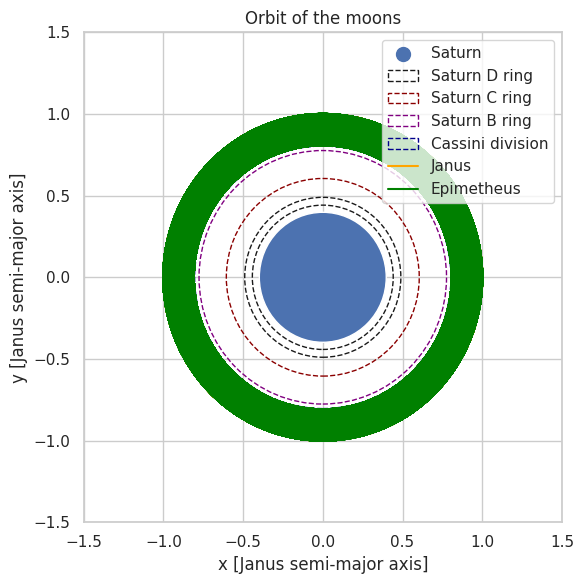

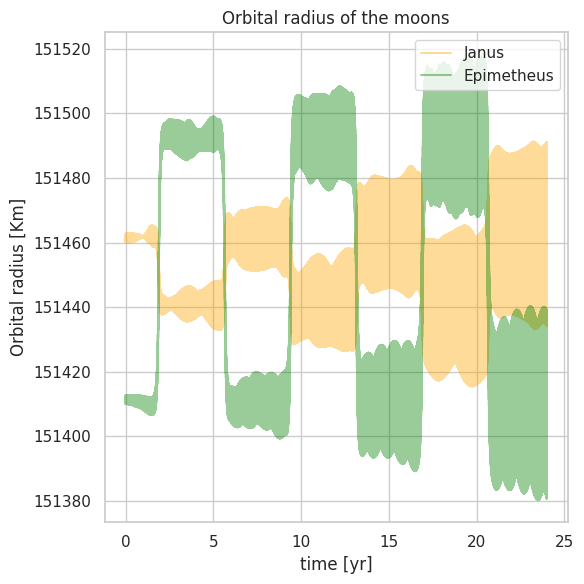

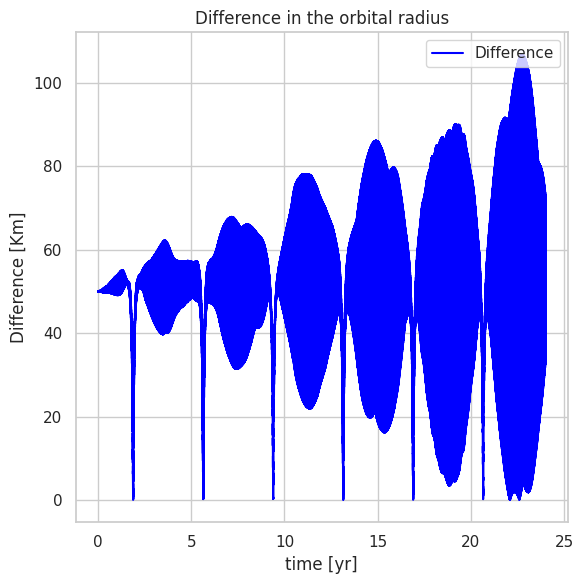

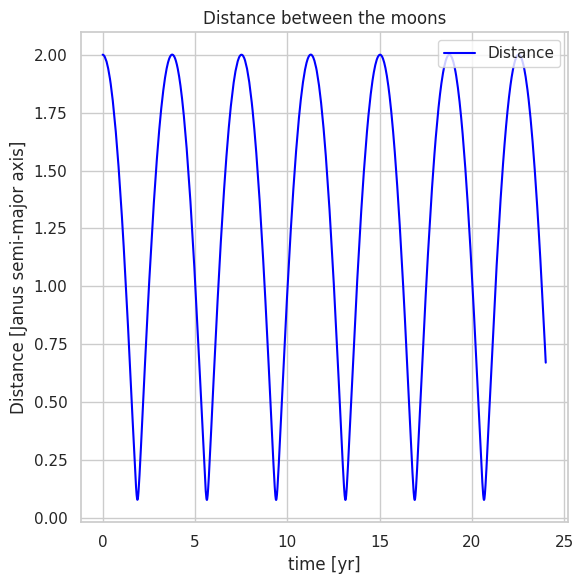

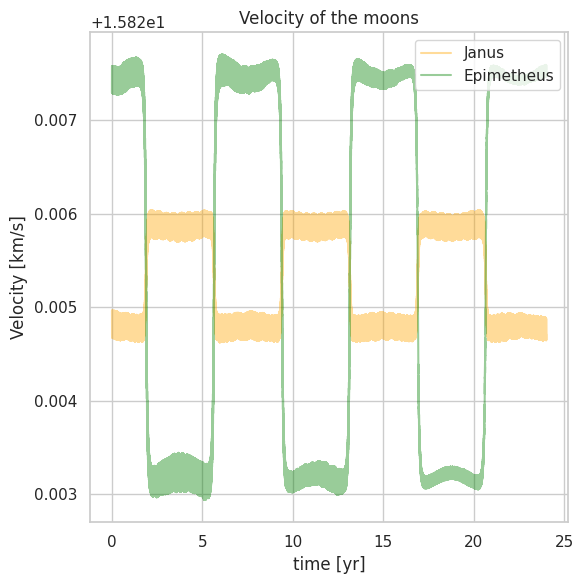

In [41]:
# PLOT THE RESULTS
plt.ion()  # Turn on interactive mode

# 1) Orbit of the moons:
fig, ax = plt.subplots(figsize=(6, 6))
Saturn = Circle((0, 0), 60268/a_scale, fill=True)
ax.scatter(System_test.pos[0, 0], System_test.pos[0, 1], s=1e2, label='Saturn')
ring1 = Circle((0, 0), 66897/a_scale, fill=False, color='k', linestyle='--')
ring2 = Circle((0, 0), 74130/a_scale, fill=False, color='k', linestyle='--')
ring3 = Circle((0, 0), 91607/a_scale, fill=False, color='darkred', linestyle='--')
ring4 = Circle((0, 0), 117523/a_scale, fill=False, color='purple', linestyle='--')
ring5 = Circle((0, 0), 121741/a_scale, fill=False, color='darkblue', linestyle='--')
ring1.set_label('Saturn D ring')
ring3.set_label('Saturn C ring')
ring4.set_label('Saturn B ring')
ring5.set_label('Cassini division')
ax.add_patch(ring1)
ax.add_patch(ring2)
ax.add_patch(ring3)
ax.add_patch(ring4)
ax.add_patch(ring5)
ax.add_patch(Saturn)
ax.plot(Physical_orbit[:, 1, 0], Physical_orbit[:, 1, 1], c='orange', label='Janus')
ax.plot(Physical_orbit[:, 2, 0], Physical_orbit[:, 2, 1], c='green', label='Epimetheus')
ax.legend(loc='upper right')
ax.set_title('Orbit of the moons')
ax.set_xlabel('x [Janus semi-major axis]')
ax.set_ylabel('y [Janus semi-major axis]')
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 1.5)
plt.tight_layout()
if save:
    fig.savefig(path+'Orbit_moons.png')

# 2) Orbital radius of the moons:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time, Physical_OrbRadius[:, 1], c='orange', alpha=0.4, label='Janus')
ax.plot(Physical_time, Physical_OrbRadius[:, 2], c='green', alpha=0.4, label='Epimetheus')
ax.legend(loc='upper right')
ax.set_title('Orbital radius of the moons')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Orbital radius [Km]')
plt.tight_layout()
if save:
    fig.savefig(path+'Orbital_radius_moons.png')

# 3) difference in the orbital radius:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time, np.abs(Physical_OrbRadius[:, 1] - Physical_OrbRadius[:, 2]), c='blue', label='Difference')
ax.legend(loc='upper right')
ax.set_title('Difference in the orbital radius')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Difference [Km]')
plt.tight_layout()
if save:
    fig.savefig(path+'Difference_orbital_radius.png')

# 4) Distance between the moons:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time, System_separation, c='blue', label='Distance')
ax.legend(loc='upper right')
ax.set_title('Distance between the moons')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Distance [Janus semi-major axis]')
plt.tight_layout()
if save:
    fig.savefig(path+'Distance_moons.png')

# 5) Velocity of the moons:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Physical_time, np.linalg.norm(Physical_vel[:, 1, :], axis=-1), alpha=0.4, c='orange', label='Janus')
ax.plot(Physical_time, np.linalg.norm(Physical_vel[:, 2, :], axis=-1), alpha=0.4, c='green', label='Epimetheus')
ax.legend(loc='upper right')
ax.set_title('Velocity of the moons')
ax.set_xlabel('time [yr]')
ax.set_ylabel('Velocity [km/s]')
plt.tight_layout()
if save:
    fig.savefig(path+'Velocity_moons.png')